# **DSCI 511 Group 3: Infectious Disease Outbreaks on Twitter**

**1.1 Mode of Distribution**

The csv output files are provided directly to users of this application. This project, and all data contained within, are considered open source for academic, research, and personal use and will be made publicly available. 

**1.2 Data Access Rights**

We have reviewed Twitter's Developer Agreement and Policy to ensure compliance with the terms and regulations. We will only use the data we collect for educational purposes, and plan to exclude actual Tweet content.


> https://developer.twitter.com/en/developer-terms/agreement-and-policy


We have reviewed the User Access Agreement provided on the CDC's website. We will be compliant with all terms and conditions. 

- Most of the information on the CDC website may be used without copyright permission.​

- This dataset is used for statistical reporting and analysis only.​

- We do not identify any person or establishment in our dataset.


> https://www.cdc.gov/other/agencymaterials.html


> https://www.cdc.gov/nchs/data_access/restrictions.htm





## 2. Code

Import all necessary modules. 

In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
from datetime import datetime
import re
from bs4 import BeautifulSoup
import snscrape.modules.twitter as sntwitter
import pandas as pd
from pprint import pprint

The following uses Beautiful Soup to scrape active outbreaks in the US from the CDC website and returns each outbreak name and announced date.

In [ ]:
CDC_URL = 'https://www.cdc.gov/outbreaks/index.html'

CDC_response = requests.get(CDC_URL)
CDC_soup = BeautifulSoup(CDC_response.text,'html.parser') 


outbreaks_and_dates = []

for item in CDC_soup.find_all('li'):
    try:
        if 'Announced' in item.find('span').text:
            
            soup_name = item.find('a').text
            soup_date = item.find('span').text.lstrip('Announced ')
            
            outbreak_name = soup_name.lower()
            outbreak_date = datetime.strptime(soup_date, '%B %Y')
            
            query_date = datetime.strftime(outbreak_date, '%Y-%m-%d')
            query_name = re.sub('[^(A-Z), (a-z), ,\d, -]', '', outbreak_name)
            
            outbreaks_and_dates.append((query_name, query_date))
            print(outbreaks_and_dates[-1])
    
    except:
        pass

('enoki mushrooms - listeria infections', '2022-11-01')
('deli meat and cheese - listeria infections', '2022-11-01')
('fish  salmonella infections', '2022-10-01')
('bearded dragons  salmonella infections', '2022-10-01')
('frozen falafel e coli infections', '2022-10-01')
('listeria outbreak linked to brie and camembert cheese', '2022-09-01')
('hepatitis of unknown cause in children', '2022-05-01')
('coronavirus disease 2019 (covid-19)', '2020-01-01')
('raw milk  drug-resistant brucella (rb51)', '2019-02-01')
('measles outbreaks 2019', '2019-01-01')
('outbreaks of hepatitis a in multiple states among people who are homeless and people who use drugs', '2017-03-01')
('us monkeypox outbreak 2022', '2022-05-01')
('coronavirus disease 2019 (covid-19)', '2020-01-01')
('2018 ebola outbreak in congo (drc)', '2018-05-01')
('2017 ebola outbreak in congo (drc)', '2017-05-01')


The returned disease outbreaks were used to manually write relevant search terms.

In [ ]:
current_outbreaks = [
    ('enoki mushrooms listeria', '2022-11-01'),
    ('listeria deli meat cheese','2022-11-01'),
    ('salmonella fish','2022-10-01'),
    ('salmonella bearded dragons','2022-10-01'),
    ('E. coli frozen falafel','2022-10-01'),
    ('listeria Brie Camembert cheese','2022-09-01'),
    ('salmonella turtles','2022-07-01'),
    ('hepatitis children','2022-05-01'),
    ('coronavirus COVID-19','2020-01-01'),
    ('lung injury e-cigarette vaping','2019-08-01'),
    ('raw milk brucella','2019-02-01'),
    ('measles','2019-01-01'),
    ('hepatitis A homeless','2017-03-01'),
    ('monkeypox','2022-05-01'),
    ('ebola congo 2018','2018-05-01'),
    ('ebola congo 2017','2017-05-01')]

The following function uses the snscrape module to query Tweets related to a passed search term and generated after a specific date. The function will then save Tweets into a Pandas Dataframe that contains four columns (Tweet_ID, Date, User_ID, Location). 


In [ ]:
def tweet_search(outbreak, announced_date):
    query = outbreak + ' since:' + announced_date
    tweets = []
    limit = 1000

    for tweet in sntwitter.TwitterSearchScraper(query).get_items():

        if len(tweets) == limit:
            break
        else:
          try:
            tweets.append([tweet.id, tweet.date, tweet.user.id, 
                           tweet.user.location])
          except:
            tweets.append([tweet.id, tweet.date, tweet.user.id, ''])

        df = pd.DataFrame(tweets, columns = ['Tweet_ID', 'Date', 'User_Id', 
                                             'Location'])
    
    return df

The following function calls the tweet_search function defined above for a passed list of (query, date) tuples. The function then generates a summary "total_tweet" csv file that lists each search term passed and the number of Tweets returned.

In [ ]:
def tweet_search_all(outbreaks):
    total_tweets = {}
    
    for name, date in outbreaks:
        search = tweet_search(name, date)
        search.to_csv(f'{name}.csv')
        total_tweets[name] = len(search)
        
    total_tweets_df = pd.DataFrame(total_tweets, index = [0])
    total_tweets_df.to_csv('total_tweet.csv')
    

    
tweet_search_all(current_outbreaks)

Finally, the tweet_search_all function was called on the list of queries defined above.

In [ ]:
tweet_search_all(current_outbreaks)

# 3. Final Discussion

**3.1 Summary of Final Output and Data**

This dataset contains tweets referencing infectious disease outbreaks in the U.S. after the official announced date on the CDC website (https://www.cdc.gov/outbreaks/index.html). Each set of tweets related to a disease outbreak was output to a csv file and a total_tweet.csv file was created that contains the total number of tweets returned for each disease.  


Each disease outbreak csv file contains the following columns: 

*   Tweet_ID: the ID of the tweet 
*   Date: the date when the tweet was generated 
*   User_ID: the ID of the Twitter user who generated the tweet 
*   Location: the location of the Twitter user 

The below figure shows the total number of returned tweets for each disease outbreak query. 

While this project limited  the maximum number of returned tweets to 1000 for each disease outbreak, the limit of tweets returned could be raised in the tweet_search function’s limit variable. 



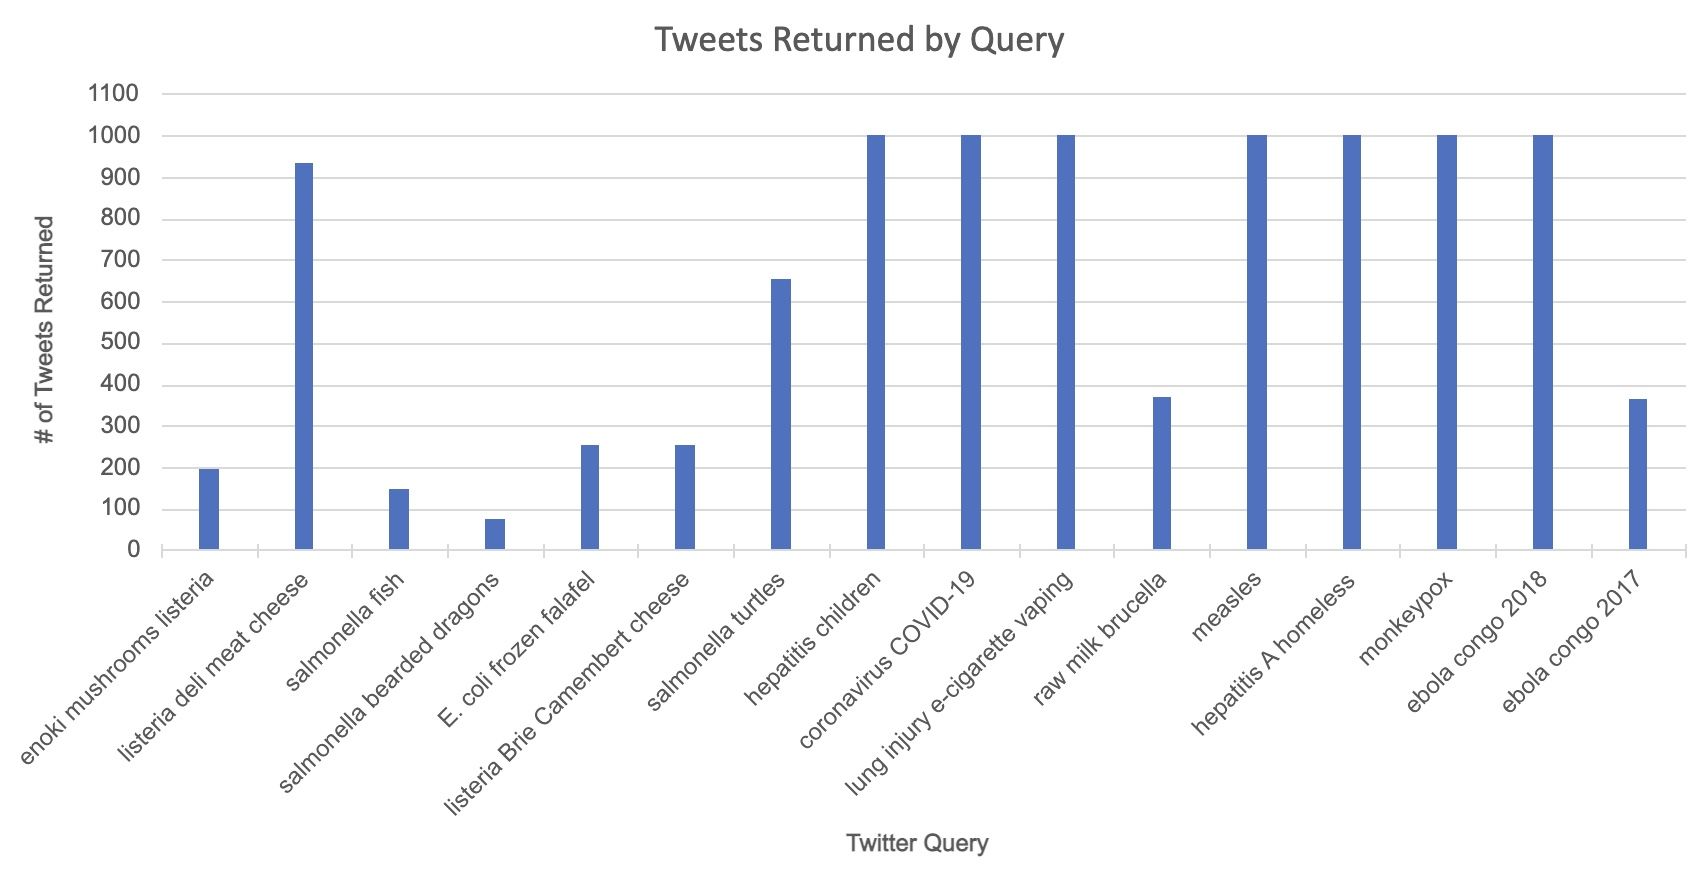

**3.2 Project Challenges and Limitations**

**3.2.1 SNScrape**

Our original plan was to use the Twitter API to search for tweets that mentioned each of the disease outbreaks. However, we encountered some problems that led us to use snscrape instead. 

According to the Twitter API documention on using the 'count' parameter, the maximum number of tweets available to return per page is 100 (https://developer.twitter.com/en/docs/twitter-api/v1/tweets/search/api-reference/get-search-tweets). To collect more than a 100 Tweets at a time for each API call, we attempted to use the metadata 'max_id' and 'since_id' to bounce back and loop through the Twitter timeline until we reached the desired number of tweets. However, we ran into a rate limit problem ("Twitter API returned a 429 (Too Many Requests), Rate limit exceeded."). This problem required us to wait between each query after we reached the rate limit for Twitter's API, which was not feasible for the large number of queries we were conducting.

Additionally, according to the Twitter website, "[t]he Twitter Search API searches against a sampling of recent Tweets published in the past 7 days" (Twitter). This means that the Twitter API does not search all tweets created, and is only limited to tweets written within the last 7 days.

Encountering these problems, we decided to instead utilize the publicly available snscrape module (https://github.com/JustAnotherArchivist/snscrape). When using snscrape to scrape social media sites, there is no limit on the number of tweets collected and no limitation to tweets that were created within the last 7 days. Utilizing snscrape, we were able to return a more complete dataset that included historical data from the original announced date of each disease outbreak.


 

**3.2.2 Other Limitations**

In our original project proposal, we discussed limiting tweets to only those that were mentioned in the U.S. However, upon working with Twitter, we learned that each user's location is free-text and not a required field. We opted to include location for each tweet as a field in the dataset, but acknowledge that this data may be both limited and unreliable. 

Additionally, we chose to omit the actual tweet content. As discussed in DSCI 511 Lecture 9, it has become the standard when distributing datasets containing social media information to only include IDs to the original posts to allow for reproducibility of the dataset construction and to be compliant with data access rights. 

An area with room for further development is the creation of the Twitter queries. We manually wrote each query based on the output from our scrape of the CDC website. However, in the future, we could build some kind of natural language processing tool to read the name of each outbreak and find meaningful queries with which to search Twitter, and perhaps to create multiple queries for each outbreak to capture all keywords. 

Another limitation to this project is the use of pandas. As the pandas documentation shows (https://pandas.pydata.org/docs/user_guide/scale.html), pandas is not always the correct tool for large datasets that do not fit into a user's local memory. Were we to continue development on this project, we would need to move to another tool to fit the larger data needs. 

**3.3 Potential Dataset End Users**

Example end users of this dataset include public health organizations, epidemiologists/other medical professionals, and academic researchers. 

Previously, Twitter has been used by epidemiologists to help spot outbreaks by analyzing posts about symptoms or confirmed disease diagnoses (Bates, 2017). Additionally, other studies have confirmed the effectiveness of using Twitter to support information dissemination related to epidemics (Abouzahra, et.al., 2021).

**3.4 Example Dataset Use and Metrics of Interest**

Government disease agencies, such as the CDC or Philadelphia Department of Public Health, and epidemiologists could compare the number of Tweets about different outbreaks generated in this project to gauge public awareness of each outbreak and potentially track new disease outbreaks. 

There is a precedence for utilizing social media platforms such as Twitter to detect disease outbreaks and disease awareness. A previous study showed an increase in Tweets about the Zika virus as new developments in the disease emerged, and that the number of Tweets about the virus within an area affected by the virus was “positively related to the number of people and the geographic region affected by the development” (Abouzahra, et.al., 2021, p.177). Another study used Twitter data to detect seasonal outbreaks of disease (Amin, et.al., 2021). And yet another study found that hashtags related to COVID-19 on Twitter spiked after important events in the course of the pandemic (Chen, et.al., 2020). These studies and others show that Twitter datasets, such as the one provided in this project, can provide useful and important information about disease outbreaks. 











**3.4.1 Some proposed dataset uses:**

*   Use the total tweet mention count to gauge public awareness when a new disease outbreak is announced on the CDC website​ 

*   Use the reported tweet locations to track how disease outbreak awareness is spreading and if this correlates with disease rates in those locations. Create targeted public awareness campaigns in those areas where tweet numbers are low but disease instance is high​

*   Rehydrate tweets using the published tweet IDs to get actual tweet content and do sentiment analysis around each disease outbreak

*   Study how mentions of disease outbreaks change over time and if the total number of tweets correlates with particular events in outbreaks, disease severity, or time since the outbreak was announced

**3.5 Tweet Rehydration Example**

---



If any users are interested in the content of tweets in the created dataset, they can use the tweet_id attribute included in the distributed csv files to obtain the text. 

To do so will require a Twitter account and Twitter API access. See below for an example. 

*Please note this is adapted from the DSCI 511 lecture 3 notes.




In [ ]:
from twython import Twython

twitter_access = Twython(consumer_key, consumer_secret)

tweetIDlist = [
  “1598031644593893376”,
  “1598031401089130497”,
  “1598029103826870272”,
  “1598029100010045441”,
  “1598028258226102272”
]

for tweetID in IDlist:
    content = twitter.show_status(id = ID)

**References:**

Abouzahra, M., & Tan, J. (2021). Twitter vs. Zika—the role of social media in epidemic outbreaks surveillance. Health Policy and Technology, 10(1), 174–181. https://doi.org/10.1016/j.hlpt.2020.10.014 

Amin, S., Uddin, M. I., alSaeed, D. H., Khan, A., & Adnan, M. (2021). Early detection of seasonal outbreaks from Twitter data using machine learning approaches. Complexity, 2021, 1–12. https://doi.org/10.1155/2021/5520366 

Bates M. (2017). Tracking Disease: Digital Epidemiology Offers New Promise in Predicting Outbreaks. IEEE pulse, 8(1), 18–22. https://doi-org.ezproxy2.library.drexel.edu/10.1109/MPUL.2016.2627238

Chen, E., Lerman, K., & Ferrara, E. (2020). Tracking social media discourse about the COVID-19 pandemic: Development of a public coronavirus Twitter data set. JMIR Public Health and Surveillance, 6(2). https://doi.org/10.2196/19273

Twitter. (n.d.). Overview | docs | twitter developer platform. Twitter. Retrieved November 15, 2022, from https://developer.twitter.com/en/docs/twitter-api/v1/tweets/search/overview 